# MSDA304: ARTIFICIAL INTELLIGENCE CAPSTONE PROJECT

# INTELLIGENT CROP SELECTOR: Deep Learning-Based Crop Recommendation System

# AUTHORS 

**1. VERONICA KENEILWE MODISANG** <br>
**2. HUDSON BARASA WALUKHA**<br>
**3. CHENGETANI BATLEGANG**<br>


# 1. Background

In Kenya and most African countries, agriculture is one of the key pillars of the economy. It is key in local and international food security as most countries get their food exported from Africa. In Kenya for instance, agricultural sector is the backbone of the economy, contributing approximately 33 percent of Kenya’s Gross Domestic Product (GDP) (USAID.GOV, 2023).
According to the Food Directorate Office of Kenya, food crops sub-sector does not meet the country's demand for food commodities and the country continues to import large quantities of food products to meet the high demand for local consumption (food.agricultureauthority.go.ke, n.d.). 
In Botswana on the other hand agriculture contributes approximately 1.76 percent to the GDP, 37.4 percent from industry and 55.87 percent from the services sector (O'Neill, 2023).According to statistics Botswana, the percentage of persons who have experienced moderate or severe food insecurity has increased to 53.29 percent nationally in 2021/22, from 51.06 percent estimated for 2020/21 (STATISTICS BOTSWANA, 2023).


# 2. Problem Statement.
Choosing the right crop to plant is a crucial decision for farmers, impacting their livelihood and food security. This decision is often based on limited information and traditional knowledge, potentially leading to lower yields and resource waste. Current methods lack the ability to consider all relevant factors and their complex interactions, resulting in suboptimal outcomes.



# 3. General Objectives:
1.Develop a robust crop recommendation system powered by deep learning.<BR>
2.Empower farmers with data-driven insights to optimize agricultural productivity.<BR>
3.Improve crop yield and contribute to sustainable agricultural practices.<BR>
4.Increase food security and enhance farm profitability by minimizing crop failure risks.<BR>
5.Make the system accessible and scalable for widespread adoption.<BR>




# 4. Specific Objectives:
1.Collect and pre-process historical agricultural data from Botswana and Kenya, on soil parameters, environmental conditions, and crop types.<BR>
2.Develop a deep learning Sequential ANN model to identify relationships between soil, environmental conditions, and suitable crops.<BR>
3.Train and validate the model on the preprocessed dataset to achieve high accuracy and generalization.<BR>
4.Develop a user-friendly interface and deploy the model using Streamlit allowing farmers to input their local data and receive customized crop recommendations.<BR>
5.Complete the project within a tight timeframe and overcome collaboration challenges due to time zone differences between Kenya and Botswana.<BR>
6.Address the project's limitations and propose future improvements for a more robust model and wider applicability.<BR>





# 5. Succes Metrics
The Intelligent Crop Selctor model will be considered successful if it meets the following
success criteria :

1. **Accuracy:** Above 90 percent score of correctly predicted crops compared to actual yields.<br>
2. **Precision:** Above 90 percent score of recommended crops that are actually suitable for the given conditions.<br>
3. **Recall:** Above 90 percent score of suitable crops that are correctly recommended by the system.<br>
4. **F1-score:** Above 90 percent balanced measure of precision and recall.<br>
6. **Generalizability:** The ability of the model to make accurate recommendations for unseen data, beyond the training dataset.<br>


# About the Data

The data used in this project is made by combining various publicly available from Kaggle,Kenyan and Botswanian agricultural databases.This data has few but useful features affecting crop yields.
The dataset has Nitrogen, Phosphorous, Pottasium, Soil pH,humidity, temperature and rainfall required for a specific crops.

## i. Data Understanding

Importing Libraries and Loading Data

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset file and get some insights

In [49]:
# Loading data
data=pd.read_csv("./304 dataset.csv")
print(data.head(2))

   Nitrogen(pmm)  Phosphorus(pmm)  Potassium(mm)  temperature(F)   humidity  \
0          113.0              7.0          211.0       18.085106  89.545473   
1          179.0             55.0          157.0       26.277512  86.710603   

    soil_ph  rainfall(mm)    label  
0  5.712243    851.391194  Carrots  
1  6.518869    449.872052   onions  


In [50]:
#Finding the Shape of Dataset
print(f'The Crop_Recommendation dataset contains {data.shape[0]} rows, and {data.shape[1]}')
# print("Dataset Shape is:", data.shape)

The Crop_Recommendation dataset contains 2304 rows, and 8


In [51]:
 # check columns
print('\n The columns in the dataset are : \n', data.columns)


 The columns in the dataset are : 
 Index(['Nitrogen(pmm)', 'Phosphorus(pmm)', 'Potassium(mm)', 'temperature(F)',
       'humidity', 'soil_ph', 'rainfall(mm)', 'label'],
      dtype='object')


In [52]:
#Find and count unique labels
data['label'].value_counts()


label
Carrots        100
onions         100
orange         100
watermelon     100
Cabbage        100
lettuce        100
cotton         100
grapes         100
coconut        100
kidneybeans    100
banana         100
maize          100
pigeonpeas     100
papaya         100
coffee         100
chickpea       100
mango          100
lentil         100
rice           100
pomegranate    100
apple           99
tomato          98
greengram       92
mungbean         8
Name: count, dtype: int64

We notice that mungbean has only 8 records in comparison to others.We just drop all records for mungbean and use the existing other records that have sufficient data.

In [53]:
# Drop all records with label "mungbean"
data = data.query('label != "mungbean"')

# Print the values
data['label'].value_counts()

label
Carrots        100
onions         100
watermelon     100
Cabbage        100
lettuce        100
cotton         100
grapes         100
coconut        100
kidneybeans    100
banana         100
maize          100
orange         100
pigeonpeas     100
papaya         100
coffee         100
chickpea       100
mango          100
lentil         100
rice           100
pomegranate    100
apple           99
tomato          98
greengram       92
Name: count, dtype: int64

In [54]:
#Count the number of unique crop labels
print("Number of various crops: ", len(data['label'].unique()))

Number of various crops:  24


In [55]:
# check descriptive analysis
print('\n Below is the Descriptive Analysis of the Dataset \n')
data.describe()



 Below is the Descriptive Analysis of the Dataset 



,Nitrogen(pmm),Phosphorus(pmm),Potassium(mm),temperature(F),humidity,soil_ph,rainfall(mm)
count,2289.000000,2289.000000,2289.000000,2289.000000,2289.000000,2289.000000,2289.000000
mean,68.529052,52.108567,99.210572,26.206392,73.446652,6.410177,163.845834
std,61.651507,35.577729,147.672003,9.651954,22.039305,0.637672,164.848868
min,0.000000,0.600000,5.000000,8.825675,14.258040,4.507524,13.549079
25%,20.000000,24.000000,23.000000,21.199095,62.670878,6.000574,71.740653
50%,40.000000,51.000000,43.000000,24.693689,81.381033,6.387431,106.977723
75%,103.000000,70.000000,135.000000,27.926786,89.683945,6.784461,168.594832
max,249.000000,145.000000,837.000000,84.995950,99.999442,8.868741,894.082229


In [56]:
#check dataframe information
print('\n Below is the metadata for the dataset \n')
data.info()


 Below is the metadata for the dataset 

<class 'pandas.core.frame.DataFrame'>
Index: 2296 entries, 0 to 2303
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nitrogen(pmm)    2289 non-null   float64
 1   Phosphorus(pmm)  2289 non-null   float64
 2   Potassium(mm)    2289 non-null   float64
 3   temperature(F)   2289 non-null   float64
 4   humidity         2289 non-null   float64
 5   soil_ph          2289 non-null   float64
 6   rainfall(mm)     2289 non-null   float64
 7   label            2289 non-null   object 
dtypes: float64(7), object(1)
memory usage: 161.4+ KB


## ii. Data Cleaning

Fixing the Data Structure,convert column names to lower case and remove wite spaces replacing them with underscore 

In [57]:
#Change column names case
data.columns = [col.lower() for col in data.columns]

#remove brackets
data.columns = [col.strip().replace('(', ' ').replace(')', '') for col in data.columns]

#replace whitespace with underscores
data.columns = [col.replace(' ', "_") for col in data.columns]


Check for Missing Values

In [58]:
#define a function for missing values.

def check_na_values(df):
 
     na_val = data.isnull().sum()
     na_val_percent = round((na_val / len(df)) * 100, 2)
     na_val_dataframe = pd.DataFrame({"Missing Values" : na_val,"Missing_Values_Percentage" : na_val_percent})
     return na_val_dataframe
                                    
check_na_values(data)

,Missing Values,Missing_Values_Percentage
nitrogen_pmm,7,0.3
phosphorus_pmm,7,0.3
potassium_mm,7,0.3
temperature_f,7,0.3
humidity,7,0.3
soil_ph,7,0.3
rainfall_mm,7,0.3
label,7,0.3


The missing values account for 3 percent of the data. These seem to be blank rows as indicated above and they just need to be removed.

In [59]:
def drop_missing_values(df):
    """function to drop all the missing values"""
    df.dropna(inplace = True)
    return df.shape
#Drop missing values
drop_missing_values(data)

(2289, 8)

In [60]:
#Count the number of unique crop labels after dropping missing values
print("Number of various crops: ", len(data['label'].unique()))

Number of various crops:  23


Change datatype for NPK values to integer and set the rest to 4 decimal places.

In [61]:
#change NPK column data type to integer
for col in ['nitrogen_pmm', 'phosphorus_pmm', 'potassium_mm']:
     data[col] = data[col].astype(int)
#Round off temperature,humidity,soil_ph and rainfall column data to 4 decimal places.
for col in ['temperature_f', 'humidity', 'soil_ph', 'rainfall_mm']:
     data[col] = data[col].round(4)
    
# preview the dataset after fixing the data structure
data.head()

,nitrogen_pmm,phosphorus_pmm,potassium_mm,temperature_f,humidity,soil_ph,rainfall_mm,label
0,113,7,211,18.0851,89.5455,5.7122,851.3912,Carrots
1,179,55,157,26.2775,86.7106,6.5189,449.8721,onions
2,16,10,41,24.7746,85.6361,6.7390,105.7596,pomegranate
3,99,57,35,26.7575,81.1773,5.9604,272.2999,rice
4,11,46,24,27.6528,89.8065,6.4593,56.5256,greengram


Check for duplicates entries

In [62]:
#define a function for checking duplicates
def check_duplicates(data):
 """This is function to check and remove duplicate entries """
 # check duplicates
 duplicates = data.duplicated().sum()
 print(f'\n There are {duplicates} duplicate entries in the crops dataset \n')

 # drop duplicates if present

 if duplicates >0:
  data.drop_duplicates(inplace = True)
       
check_duplicates(data)


 There are 0 duplicate entries in the crops dataset 



There are no missing values or duplicate entries in the dataset. </br>
At this point we move to Exploratory Data Analysis.

## iii. Exploratory Data Analysis

Import necessary libraries

In [63]:
#importing Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
#Preview the dataset to explore and analyze
data.head()

,nitrogen_pmm,phosphorus_pmm,potassium_mm,temperature_f,humidity,soil_ph,rainfall_mm,label
0,113,7,211,18.0851,89.5455,5.7122,851.3912,Carrots
1,179,55,157,26.2775,86.7106,6.5189,449.8721,onions
2,16,10,41,24.7746,85.6361,6.7390,105.7596,pomegranate
3,99,57,35,26.7575,81.1773,5.9604,272.2999,rice
4,11,46,24,27.6528,89.8065,6.4593,56.5256,greengram


##### Data Visualization and analysis

We will carry out the following analyses:

* Bivariate Analysis: Explores the analysis of two variables to be able to determine the relationship between the two

* Multivariate Analysis: Explores the relationship of more than two variables 

Get the average feature requirements for various plants.

In [65]:
crop_average = pd.pivot_table(data,index=['label'],aggfunc='mean').round(2)
crop_average.head(5)

,humidity,nitrogen_pmm,phosphorus_pmm,potassium_mm,rainfall_mm,soil_ph,temperature_f
label,,,,,,,
Cabbage,75.46,223.52,58.79,74.50,357.65,6.39,20.50
Carrots,85.15,103.13,5.28,250.95,748.97,6.23,19.09
apple,92.35,20.77,134.28,199.93,112.68,5.93,22.63
banana,80.36,100.23,82.01,50.05,104.63,5.98,27.38
chickpea,16.86,40.09,67.79,79.92,80.06,7.34,18.87


> Bivariate Analysis

* Nitrogen Requirements for different crops

In [66]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import random
# create and sort DataFrame
nitrogen_summary = crop_average.sort_values(by='nitrogen_pmm', ascending=False)
# Create subplots
fig = make_subplots(rows=1, cols=2)
# Define data for subplots
top = nitrogen_summary.head(10)
last = nitrogen_summary.tail(10)
# Generate unique color palettes for top and last
color_palette_top = px.colors.qualitative.Set1
color_palette_last = px.colors.qualitative.Set2
# Add bar traces to subplots
fig.add_trace(go.Bar(y=top.index,x=top['nitrogen_pmm'],name="Nitrogen Intensive Crops",
        marker_color=random.choice(color_palette_top),
        orientation='h',text=top['nitrogen_pmm']),row=1, col=1)
fig.add_trace(go.Bar(y=last.index,x=last['nitrogen_pmm'],name="Least Nitrogen intensive Crops",
        marker_color=random.choice(color_palette_last),orientation='h',text=last['nitrogen_pmm']
    ),row=1, col=2)

# Update trace settings and layout
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen Requirements per Crop",
    plot_bgcolor='white', font_size=12,font_color='black', height=500)
# Update axes and display the figure
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


Cabbages,tomatoes,and onions are the most Nitrogen intensive vagetables and lettuce is the least nitrogen intensive vegetable.Different crops have varying nitrogen requirements. Some crops require a high amount of nitrogen for optimal growth and yield, while others, like lettuce, greengram, and apple, have low nitrogen requirements.Understanding these nitrogen requirements is crucial for farmers to optimize fertilizer application, which can improve crop yields,and reduce environmental impact by minimizing excess nitrogen runoff, which can contribute to water pollution.

*  Phosphorus Requirements for different crops

In [77]:
# create and sort phosphorus DataFrame
phosphorus_summary= crop_average.sort_values(by='phosphorus_pmm', ascending=False)
# Create subplots
fig = make_subplots(rows=1, cols=2)
# Define data for subplots
top = phosphorus_summary.head(10)
last = phosphorus_summary.tail(10)
# Generate unique color palettes for top and last
color_palette_top = px.colors.qualitative.Set1
color_palette_last = px.colors.qualitative.Set2
# Add bar traces to subplots
fig.add_trace(  go.Bar(y=top.index,
        x=top['phosphorus_pmm'],name="Most phosphurus required",
        marker_color=random.choice(color_palette_top),orientation='h', text=top['phosphorus_pmm']
    ),row=1, col=1)
fig.add_trace( go.Bar(y=last.index,
        x=last['phosphorus_pmm'],name="Least Phosphorus required",
        marker_color=random.choice(color_palette_last),orientation='h',text=last['phosphorus_pmm']  ),row=1, col=2)
# Update trace settings and layout
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Phosphorus Requirements per Crop",plot_bgcolor='white',
    font_size=12,font_color='black',height=500)
# Update axes and display the figure
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Apples,Grapes and tomatoes require a lot of Phosphorus while lettuce,carrots and oranges require very little Phosphorus.

 * Potassium Requirements for different crops

In [78]:
# create and sort DataFrame
potassium_summary= crop_average.sort_values(by='potassium_mm', ascending=False)
# Create subplots
fig = make_subplots(rows=1, cols=2)
# Define data for subplots
top = potassium_summary.head(10)
last = potassium_summary.tail(10)
# Generate unique color palettes for top and last
color_palette_top = px.colors.qualitative.Set1
color_palette_last = px.colors.qualitative.Set2
# Add bar traces to subplots
fig.add_trace(go.Bar(y=top.index,x=top['potassium_mm'],name="Potassium Intensive Crops",
        marker_color=random.choice(color_palette_top),orientation='h',text=top['potassium_mm']
    ),row=1, col=1)
fig.add_trace(go.Bar(y=last.index,x=last['potassium_mm'],name="Least Potassium Intensive Crops",
        marker_color=random.choice(color_palette_last),orientation='h',
        text=last['potassium_mm']),row=1, col=2)
# Update trace settings and layout
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Potassium Requirements per Crop",
    plot_bgcolor='white',font_size=12,font_color='black',height=500)
# Update axes and display the figure
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Lettuce and Carrots are a Potassium intensive crops while oranges,lentils,cotton,maize and greengrams require very little Potassium.

* Temperature Requirements for different crops

In [79]:
# create and sort DataFrame
temperature_summary= crop_average.sort_values(by='temperature_f', ascending=True)
# Create subplots
fig = make_subplots(rows=1, cols=2)
# Define data for subplots
top = temperature_summary.nlargest(10,'temperature_f')
last = temperature_summary.nsmallest(10,'temperature_f')
# Generate unique color palettes for top and last
color_palette_top = px.colors.qualitative.Set1
color_palette_last = px.colors.qualitative.Set2
# Add bar traces to subplots
fig.add_trace(go.Bar( y=top.index, x=top['temperature_f'],name="Crops that thrive in High Temperatures",
        marker_color=random.choice(color_palette_top), orientation='h',
        text=top['temperature_f']),row=1, col=1)
fig.add_trace(go.Bar(y=last.index, x=last['temperature_f'],
        name="Crops that thrive in low temperatures",marker_color=random.choice(color_palette_last),
        orientation='h',text=last['temperature_f']),row=1, col=2)
# Update trace settings and layout
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Tempertaure distribution for different crops",
    plot_bgcolor='white',font_size=12, font_color='black',height=500)
# Update axes and display the figure
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Lettuce thrives in high temperatures and chickpeas does well in low temperatures.

In [80]:
# create and sort DataFrame
temperature_summary= crop_average.sort_values(by='humidity', ascending=False)
# Create subplots
fig = make_subplots(rows=1, cols=2)
# Define data for subplots
top = temperature_summary.nlargest(10,'humidity')
last = temperature_summary.nsmallest(10,'humidity')
# Generate unique color palettes for top and last
color_palette_top = px.colors.qualitative.Set1
color_palette_last = px.colors.qualitative.Set2
# Add bar traces to subplots
fig.add_trace(go.Bar(y=top.index,x=top['humidity'],name="High humidity crops",
        marker_color=random.choice(color_palette_top),orientation='h',
        text=top['humidity']),row=1, col=1)
fig.add_trace(go.Bar(y=last.index,x=last['humidity'],name="Least humidity Crops",
        marker_color=random.choice(color_palette_last),orientation='h',
        text=last['humidity']),row=1, col=2)
# Update trace settings and layout
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Humidity distribution for different Crops",
    plot_bgcolor='white',font_size=12,font_color='black',height=500)
# Update axes and display the figure
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Lettuce,coconut,papaya,apples and oranges do well in high humidity while chickpea is the crop that needs least humidity.

* Soils PH Requirements for different crops

In [81]:
# create and sort DataFrame
temperature_summary= crop_average.sort_values(by='soil_ph', ascending=False)
# Create subplots
fig = make_subplots(rows=1, cols=2)
# Define data for subplots
top = temperature_summary.nlargest(10,'soil_ph')
last = temperature_summary.nsmallest(10,'soil_ph')
# Generate unique color palettes for top and last
color_palette_top = px.colors.qualitative.Set1
color_palette_last = px.colors.qualitative.Set2
# Add bar traces to subplots
fig.add_trace(go.Bar(y=top.index,x=top['soil_ph'],name="High ph crops",
        marker_color=random.choice(color_palette_top),orientation='h',
        text=top['soil_ph']),row=1, col=1)
fig.add_trace(go.Bar(y=last.index,x=last['soil_ph'],name="Least ph Crops",
        marker_color=random.choice(color_palette_last),orientation='h',
        text=last['soil_ph']),row=1, col=2)
# Update trace settings and layout
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="soil_ph distribution for different Crops", plot_bgcolor='white',
    font_size=12,font_color='black',height=500)
# Update axes and display the figure
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

All crops in the dataset do well in slightly acidic ranging from 5.75 to neutral soil PH of 7.34.

* Rainfall Requirements for different crops

In [82]:
# create and sort DataFrame
temperature_summary= crop_average.sort_values(by='rainfall_mm', ascending=False)

# Create subplots
fig = make_subplots(rows=1, cols=2)

# Define data for subplots
top = temperature_summary.nlargest(10,'rainfall_mm')
last = temperature_summary.nsmallest(10,'rainfall_mm')

# Generate unique color palettes for top and last
color_palette_top = px.colors.qualitative.Set1
color_palette_last = px.colors.qualitative.Set2

# Add bar traces to subplots
fig.add_trace(
    go.Bar(
        y=top.index,
        x=top['rainfall_mm'],
        name="High rainfall crops",
        marker_color=random.choice(color_palette_top),
        orientation='h',
        text=top['rainfall_mm']
    ),row=1, col=1)

fig.add_trace(
    go.Bar(
        y=last.index,
        x=last['rainfall_mm'],
        name="Least rainfall Crops",
        marker_color=random.choice(color_palette_last),
        orientation='h',
        text=last['rainfall_mm']
    ),row=1, col=2)

# Update trace settings and layout
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(
    title_text="Average rainfall requirements for different Crops",
    plot_bgcolor='white',
    font_size=12,
    font_color='black',
    height=500
)

# Update axes and display the figure
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Carrots and onions cabbages and rice require high rainfall while tomamto,lentil and greengrams need little to moderate rains.

### Multivariate Analysis


###### Comparing Nitrogen,Phosphorus and Potassium

In [83]:
def create_bar_trace(x, y, name, color):
    return go.Bar(x=x,y=y,name=name,marker_color=color)
#nitrogen_pmm,phosphorus_pmm,potassium_mm
fig = go.Figure()
#set color schemes for the bars
color_middle=random.choice(px.colors.qualitative.Set2)
color_top = random.choice(px.colors.qualitative.Set1)
color_last=random.choice(px.colors.qualitative.Set3)
# Create traces for Nitrogen (N), Phosphorous (P), and Potash (K)
nitrogen = create_bar_trace(crop_average.index, crop_average['nitrogen_pmm'], 'Nitrogen', color_top)
phosphorous = create_bar_trace(crop_average.index, crop_average['phosphorus_pmm'], 'Phosphorous', color_middle)
potassium = create_bar_trace(crop_average.index, crop_average['phosphorus_pmm'], 'Potassium', color_last)
# Add traces to the figure
fig.add_trace(nitrogen)
fig.add_trace(phosphorous)
fig.add_trace(potassium)
# Update layout settings
fig.update_layout(
    title="Nitrogen, Phosphorus, Potassium values comparison between crops",
    plot_bgcolor='white',
    barmode='group',  # 'group' for grouped bars, 'stack' for stacked bars
    xaxis_tickangle=-60  # Rotate x-axis labels for better visibility
)
# Show the figure
fig.show()


Cabbages,carrots,bananas,coffee,cotton,maize,onion,rice,tomamto and watermelon are crops that take a the highest amount of Nitrogen compared to Phosphorus and Potassium in comparison to other crops.

###### Rainfal,Humidity and Temperature Comparison

In [84]:
fig = go.Figure()

# Create traces temperature,humidty and Rainfall
temperature = create_bar_trace(crop_average.index, crop_average['temperature_f'], 'Temperature', color_top)
humidity = create_bar_trace(crop_average.index, crop_average['humidity'], 'Humidity', color_middle)
rainfall = create_bar_trace(crop_average.index, crop_average['rainfall_mm'], 'Rainfall', color_last)

# Add traces to the figure
fig.add_trace(temperature)
fig.add_trace(humidity)
fig.add_trace(rainfall)

# Update layout settings
fig.update_layout(
    title="Comparision between rainfall, temerature and humidity",
    plot_bgcolor='white',
    barmode='group',  # 'group' for grouped bars, 'stack' for stacked bars
    xaxis_tickangle=-60,  # Rotate x-axis labels for better visibility
    **{"height": 500},
    **{"margin": {"t": 50, "b": 50, "l": 50, "r": 50}},  # Customize margins**
)
# Show the figure
fig.show()


Cabbages,Carrots,onions and rice requires highest amounts of rainfall.

#### NPK Distribution for Crop Categories

###### Vegetables

In [85]:
crop_average.head(2)

,humidity,nitrogen_pmm,phosphorus_pmm,potassium_mm,rainfall_mm,soil_ph,temperature_f
label,,,,,,,
Cabbage,75.46,223.52,58.79,74.50,357.65,6.39,20.50
Carrots,85.15,103.13,5.28,250.95,748.97,6.23,19.09


In [86]:
#Get the all crops  to categorize
crops=data['label'].unique()
plants=crops.tolist

# Define crop categories
categories = {"vegetables": ["Carrots", "onions", "lettuce", "tomato", "Cabbage"],
              "cereals": ["rice", "maize",'X'],
              "fruits": ["pomegranate", "mango", "apple", "papaya", "banana", "grapes", "orange"],
              "legumes": ["greengram", "lentil", "chickpea", "pigeonpeas", "kidneybeans"],
              "others": ["coffee", "coconut", "cotton"]}


# Function to create a pie chart for NPK values
def create_npk_pie_chart(data, crop_category):
    """ This function takes a dataframe and crop_category then it plots 
        NPK values of each plant in the given category """
    
    # Filter data based on selected category
    selected_plants = categories.get(crop_category, [])

    # Create subplot with space between charts
    fig = make_subplots(rows=1, cols=len(selected_plants), specs=[[{'type': 'domain'}]*len(selected_plants)],
                        subplot_titles=selected_plants)

    # Create and add pie charts for each plant in the selected category
    for i, plant_name in enumerate(selected_plants):
        filtered_data = data[data['label'] == plant_name]
        avg_npk_values = filtered_data[['nitrogen_pmm', 'phosphorus_pmm', 'potassium_mm']].mean()
        values_npk = [avg_npk_values['nitrogen_pmm'], avg_npk_values['phosphorus_pmm'], avg_npk_values['potassium_mm']]

        fig.add_trace(go.Pie(labels=['Nitrogen(N)', 'Phosphorous(P)', 'Potassium(K)'], values=values_npk, hole=0,
                             marker=dict(colors=['red', 'blue', 'green']), name=plant_name), 1, i + 1)

        # Update layout for individual pie chart
        fig.update_layout(title_text=f"{plant_name}", showlegend=True, width=400)

    # Update overall layout with spacing, crop names, and NPK legend
    fig.update_layout(title_text=f"NPK Charts for {crop_category}", title_x=0.5,
                      legend=dict(x=1.1, y=0.5, traceorder='normal', orientation='v'),
                      margin=dict(l=40, r=20, b=20, t=40),
                      width=len(selected_plants)*150 + (len(selected_plants)-1)*20)

    # Show the figure
    fig.show()

# Call the function to create and display pie charts
create_npk_pie_chart(data, "vegetables")


Vegetables are Potassium and Nitrogen intesive crops with exeption of lettuce which does well in high Potassium but low nitrogen soils. All vegetable crops seem to do well in low Phosphorus.
The pie charts represent the proportional distribution of NPK in the fertilizer blend recommended for each vegetable, not the exact amount of fertilizer to be applied.

###### Fruits

In [30]:
# Call the function to create and display pie charts for fruits
create_npk_pie_chart(data, "fruits")

Pomes,Apples and Grapes are Potassium Intensive crops.Oranges and Bananas are Nitrogen intensive crops.
All fruits use a fair amount of Phosphorus as indicated in the charts above.The pie charts represent the proportional distribution of NPK in the fertilizer blend recommended for each fruit, not the exact amount of fertilizer to be applied.

###### Legumes 

In [87]:
#Call the function to create and display pie charts for fruits
create_npk_pie_chart(data, "legumes")

Greengram,lentil,pigeonpeas and mungbeans are phosphorus(P) intensive. All legumes seem to have a balanced intake for Nitrogen(N) and Potassium(K). Similar to the charts for fruits, these pie charts represent the proportional distribution of NPK in the recommended fertilizer blend, not the exact amount to be applied.

###### Cereals

In [88]:
#Call the function to create and display pie charts for cereals
create_npk_pie_chart(data, "cereals")

Cereals are Nitrogen(N) intensive with a balance ratio of Potassium(K) and Phosphorus(P). As with previous charts, these pie charts represent the proportional distribution of NPK in the suggested fertilizer blend, not the exact amount of fertilizer to be applied.

###### Other Cash Crops

In [33]:
#Call the function to create and display pie charts for others
create_npk_pie_chart(data, "others")

Coffee and Cotton require higher amounts of Nitrogen(N) compared to coconut which is Potassium(K) intesive. All crops in the category seem to use equal amounts of Phosphorus(P).

##### Rainfall,Temperature and Humidity Conditions for Crop Categories
</br>
</br>

###### Vegetables

In [34]:
# Function to create a pie chart for NPKTemperature,Rainfall & Humidity values
def create_thr_pie_chart(data, crop_category):
    """ This function takes a dataframe and crop_category then it plots 
       Temperature,Rainfall & Humidity for each plant in the given category """
    
    # Filter data based on selected category
    selected_plants = categories.get(crop_category, [])

    # Create subplot with space between charts
    fig = make_subplots(rows=1, cols=len(selected_plants), specs=[[{'type': 'domain'}]*len(selected_plants)],
                        subplot_titles=selected_plants)

    # Create and add pie charts for each plant in the selected category
    for i, plant_name in enumerate(selected_plants):
        filtered_data = data[data['label'] == plant_name]
        avg_thr_values = filtered_data[['temperature_f', 'humidity', 'rainfall_mm']].mean()
        values_thr = [avg_thr_values['temperature_f'], avg_thr_values['humidity'], avg_thr_values['rainfall_mm']]

        fig.add_trace(go.Pie(labels=['Temperature', 'Humidity', 'Rainfall'], values=values_thr, hole=0,
                             marker=dict(colors=['red', 'blue', 'green']), name=plant_name), 1, i + 1)

        # Update layout for individual pie chart
        fig.update_layout(title_text=f"{plant_name}", showlegend=True, width=400)

    # Update overall layout with spacing, crop names, and THR legend
    fig.update_layout(title_text=f"Temperature,Rainfall & Humidity Charts for {crop_category}", title_x=0.5,
                      legend=dict(x=1.1, y=0.5, traceorder='normal', orientation='v'),
                      margin=dict(l=40, r=20, b=20, t=40),
                      width=len(selected_plants)*150 + (len(selected_plants)-1)*20)

    # Show the figure
    fig.show()
    

create_thr_pie_chart(data, "vegetables")

All vegetables require rains surpassing humidity and rainfall except tomatoes which need higher humidity and moderate temperature and rainfall.

In [89]:
#create piecharts for legumes
create_thr_pie_chart(data, "legumes")

All legumes require more rainfall compared to temperature and humidity except greengrams and lentil which require more humidity than rainfall and high tempretaures.

In [90]:
#create piecharts for legumes
create_thr_pie_chart(data, "fruits")

All fruits require high amounts of rain in comparison to temperatures and humidity except of grapes which require morehumidity.

In [91]:
#create piecharts for legumes
create_thr_pie_chart(data, "cereals")

All cereals require more rain compared to temperature and humidity. Maize require a higher amount of humidity compared to rice.On the other hand Rice takes excessive amounts of rain comapred to maize.

In [92]:
#create piecharts for legumes
create_thr_pie_chart(data, "others")

Cotton.coffee and coconut require more rainfall compared to temeprature and humidity. Cotton does well in high coconut thrive have significant ratio of Rainfall followed by humidity.

##### Correlation of different features

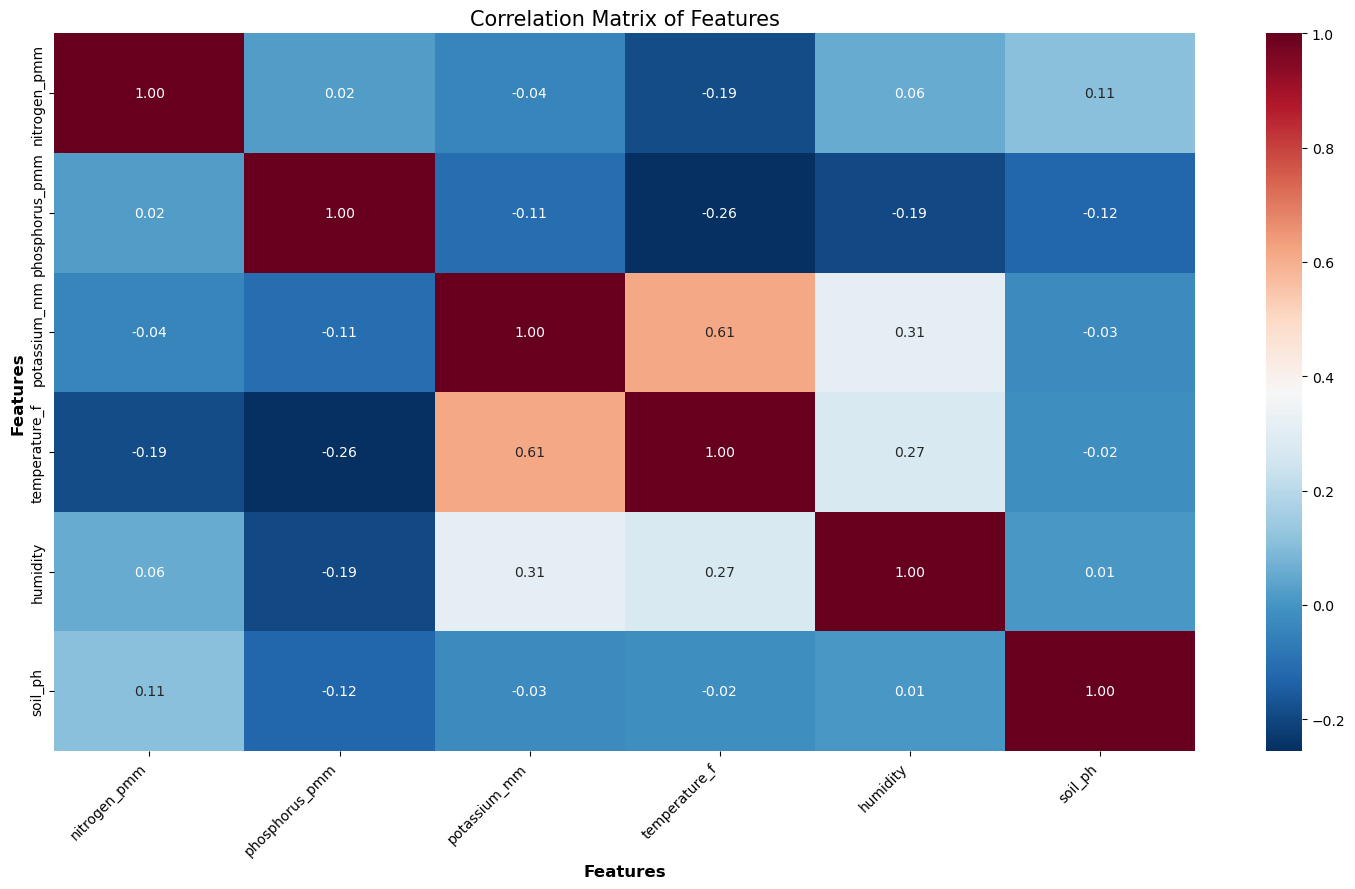

In [93]:
# Import necessary libraries
import seaborn as sns
# Select relevant features from the dataset
features = data[['nitrogen_pmm', 'phosphorus_pmm', 'potassium_mm', 'temperature_f', 'humidity', 'soil_ph']]
# Create a figure and subplot for the heatmap
fig, ax = plt.subplots(figsize=(15, 9))

 # Choose a diverging colormap to emphasize positive and negative correlations
sns.heatmap(features.corr(), annot=True,cmap='RdBu_r', fmt='.2f',annot_kws={"fontsize": 10})  # 'fmt' controls decimal places shown

# Customize axis labels and title
ax.set_xlabel('Features', fontsize=12, fontweight='bold')
ax.set_ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Correlation Matrix of Features', fontsize=15, color='black')

# Adjust layout and grid properties
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
# Display the heatmap
plt.show()


###### Observations

###### Soil PH:
* Shows a strong positive correlation with Potassium(K) and Phosphorus(P).
* Has a moderate positive correlation with Temperature.
* Shows weak positive correlations or no significant correlation with Nitrogen and Humidity.
###### Potassium (K):
* Exhibits a strong positive correlation with Soil PH and Phosphorus.
* Has weak positive correlations or no significant correlation with Nitrogen(N), Temperature, and Humidity.
###### Phosphorus (P):
* Shows a strong positive correlation with Soil PH and Potassium(K).
* Has weak positive correlations or no significant correlation with Nitrogen(N), Temperature, and Humidity.
###### Nitrogen (N):
* Shows weak positive correlations or no significant correlation with all other features.
###### Temperature (F):
* Has a moderate positive correlation with Soil PH.
* Shows weak positive correlations or no significant correlation with other features.
###### Humidity:
* Shows weak positive correlations or no significant correlation with all other features.

## iv. Data Preprocessing

In [94]:
#Import necessary libaries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import joblib 
from joblib import dump, load
import pickle


Difine features (x) and (y)

In [95]:
# Separate features (X) and labels (y)
# X = data.drop(columns =['label'])
# y = data['label']

X= data.iloc[:, :-1].values
y= data.iloc[:, -1].values

Numerical Encoding for categorical features

In [96]:
# Convert string labels to numerical format using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


# Save label_encoder for later use
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

Split features

In [97]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Standardize the input features

In [98]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Save the scaler to a file
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

## v. Modelling 

This project aims at using deep learning techniques and algorithms to classify crops according to input parameters.However, we will try other classification algorithms to learn and look at the accuracy of these models and comapre them with the ANN model to determine the best model to deploy.
For this project,we will try to see the performance of the following algorthims other than Artificial Neural Networks:
###### 1. Support Vector Machine Algorithm 
###### 2. Decision Tree Algorithm
###### 3. Random Forest Algorithm
###### 4. Gradient Boosting Algorithm
###### 5. K-Nearest Neighbors Algorithm

We will eventually create an artifical neural network model and compare the performance.
</br>
###### 6. Sequential Deep Neural Network Algorithm
</br>

Import necessary libaraies for ML algorithms

In [104]:
#import necessary libararies
import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn import preprocessing

Define a function for printing classification metrics.

In [105]:
#a function for clasifcation metrics
def print_classification_metrics(labels, preds):

    """A function to print classification metrics"""
    
    print("Precision: {}". format(precision_score(labels, preds, average = 'weighted').round(4)))
    print("Recall : {}".format(recall_score(labels, preds, average = 'weighted').round(4)))
    print("F1-SCore: {}".format(f1_score(labels, preds, average = 'weighted').round(4)))
    print("Accuracy:{}".format(accuracy_score(labels, preds).round(4)))
    #print("Classification Report:\n", classification_report(y_test, y_pred_smv))
    
    

### 1. Support Vector Machine Algorithm 

In [106]:
#initialize the model
SVM_model=SVC()

#record start of training
start_time=time.time()
# Train and evaluate the model
SVM_model.fit(X_train, y_train)
#record end of trainng
end_time=time.time()
# Calculate the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")
#Evaluate the model on the test set
y_pred_smv=SVM_model.predict(X_test)
#Print classification metrics
print(f"\n{SVM_model} Classicfication Metrics \n")
print_classification_metrics(y_test,y_pred_smv)

Training Time: 0.15 seconds

SVC() Classicfication Metrics 

Precision: 0.9777
Recall : 0.9716
F1-SCore: 0.9702
Accuracy:0.9716


### 2. Dicision Tree Algorithm 

In [107]:
#Initialize 
DT_model=DecisionTreeClassifier()
#record start of training
start_time=time.time()
# Train and evaluate the model
DT_model.fit(X_train, y_train)
#record end of trainng
end_time=time.time()
# Calculate the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")
# Evaluate the model on the test set
y_pred_dt=DT_model.predict(X_test)
#Print classification metrics
print(f"\n{DT_model} Classicfication Metrics \n")

print_classification_metrics(y_test,y_pred_smv)

Training Time: 0.07 seconds

DecisionTreeClassifier() Classicfication Metrics 

Precision: 0.9777
Recall : 0.9716
F1-SCore: 0.9702
Accuracy:0.9716


### 3. Random Forest Algorithm 

In [108]:
import time
#Intialize the model
RF_model=RandomForestClassifier()

start_time=time.time()
# Train and evaluate the model
RF_model.fit(X_train, y_train)
end_time=time.time()
# Calculate the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")
# Evaluate the model on the test set
y_pred_rf=RF_model.predict(X_test)
#Print classification metrics
print(f"\n{RF_model} Classicfication Metrics \n")

print_classification_metrics(y_test,y_pred_rf)

Training Time: 1.48 seconds

RandomForestClassifier() Classicfication Metrics 

Precision: 1.0
Recall : 1.0
F1-SCore: 1.0
Accuracy:1.0


### 4.K-Nearest Neighbours Algorithm

In [109]:
#initialize the model
KNN_model=KNeighborsClassifier()
# Record the start time
start_time = time.time()
# Train and evaluate the model
KNN_model.fit(X_train,y_train)
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")
# Evaluate the model on the test set
y_pred_knn=KNN_model.predict(X_test)
#Print classification metrics
print(f"\n{KNN_model} Classicfication Metrics \n")

print_classification_metrics(y_test,y_pred_knn)

Training Time: 0.01 seconds

KNeighborsClassifier() Classicfication Metrics 

Precision: 0.975
Recall : 0.9716
F1-SCore: 0.9711
Accuracy:0.9716


### 5. Gradient Boosting Algorithm

In [118]:
import time
#initialize the model
GB_model=GradientBoostingClassifier()
# Record the start time
start_time = time.time()
# Train and evaluate the model
GB_model.fit(X_train,y_train)
# Record the end time
end_time = time.time()
# Calculate the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")
#Evaluate the model on the test set
y_pred_gb=GB_model.predict(X_test)
#Print classification metrics
print(f"\n{GB_model} Classicfication Metrics \n")
print_classification_metrics(y_test,y_pred_gb)

Training Time: 52.70 seconds

GradientBoostingClassifier() Classicfication Metrics 

Precision: 1.0
Recall : 1.0
F1-SCore: 1.0
Accuracy:1.0


### 6. Artificial Neural Networks-Sequential NN

Import Dependencies

In [119]:
#Import necessary libaries
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")  # Suppress specific warnings if needed
warnings.filterwarnings("ignore", "use_inf_as_na")  # Suppress specific warnings if needed
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.models import save_model
import time

In [115]:
# Define the model and add layers
ANN_model = Sequential([Dense(128, input_dim=X_train.shape[1], activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(24, activation='softmax')])
# Compile the model with optimizer, loss, and metrics
ANN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set early stopping monitor
early_stopping_monitor = EarlyStopping(patience=4)

# Record the start time for model training
start_time = time.time()
# Train the model
ANN_model.fit(X_train, y_train, epochs=80, batch_size=30, validation_split=0.2,callbacks=[early_stopping_monitor] )
# Record the time the modelstops the training
end_time = time.time()
# # Calculate the training time
# training_time = end_time - start_time
# print(f"Training Time: {training_time:.2f} seconds")

Epoch 1/80
49/49 [==============================] - 2s 13ms/step - loss: 2.6206 - accuracy: 0.3620 - val_loss: 2.1263 - val_accuracy: 0.5722
Epoch 2/80
49/49 [==============================] - 0s 6ms/step - loss: 1.5789 - accuracy: 0.6981 - val_loss: 1.1699 - val_accuracy: 0.7820
Epoch 3/80
49/49 [==============================] - 0s 7ms/step - loss: 0.8344 - accuracy: 0.8497 - val_loss: 0.6284 - val_accuracy: 0.9019
Epoch 4/80
49/49 [==============================] - 0s 7ms/step - loss: 0.4699 - accuracy: 0.9262 - val_loss: 0.4128 - val_accuracy: 0.9155
Epoch 5/80
49/49 [==============================] - 0s 5ms/step - loss: 0.3063 - accuracy: 0.9454 - val_loss: 0.2908 - val_accuracy: 0.9455
Epoch 6/80
49/49 [==============================] - 0s 6ms/step - loss: 0.2202 - accuracy: 0.9570 - val_loss: 0.2149 - val_accuracy: 0.9564
Epoch 7/80
49/49 [==============================] - 0s 6ms/step - loss: 0.1718 - accuracy: 0.9631 - val_loss: 0.1761 - val_accuracy: 0.9564
Epoch 8/80
49/49 [=

Make Predictions and Generate a classifcation report for the Neural Network Model

In [120]:
# Make predictions on the test set
y_pred_ann =ANN_model.predict(X_test)

# Convert the predicted probabilities to class
predicted_classes = np.argmax(y_pred_ann, axis=1)

# Calculate the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")
#Print classification metrics
print(f"\n{ANN_model} Classicfication Metrics \n")
print_classification_metrics(y_test,predicted_classes)



15/15 [==============================] - 0s 5ms/step
Training Time: 52.70 seconds

<keras.src.engine.sequential.Sequential object at 0x000001D289C85C10> Classicfication Metrics 

Precision: 0.9979
Recall : 0.9978
F1-SCore: 0.9978
Accuracy:0.9978


The results for the ANN model above show that the model achieved very high performance on the test set, with precision, recall, F1-score, and accuracy all close to 1.00. This suggests that the model is performing well in classifying the data.
</br>
*Overfitting:* Achieving perfect or near-perfect scores on the training and testing set can be a sign of overfitting.To rule out overfitting,we look at the model's performance on unseen data to get a more realistic assessment.

Testing the ANN model with unseen data to evaluate its generalizability.

In [121]:
#test model on unseen data
new_data_1 = np.array([[119,4,258,22.84260008,87.53234569,5.676196258,760.2091829]])#Carrots
new_data_2=np.array([[103,51,20,22.80213132,84.14668447,7.046607434, 91.6389565]])#cotton

# Standardizing the new data using the same scaler used for training
new_data_point_scaled = scaler.transform(new_data_1)
# Make predictions
predictions = ANN_model.predict(new_data_point_scaled)
# Decode the one-hot encoded predictions to obtain the predicted class
predicted_class =np.argmax(predictions)

# Decode the numerical class to the original label
predicted_label = label_encoder.inverse_transform([predicted_class])[0]
print(f"Predicted Label: {predicted_label}")

1/1 [==============================] - 0s 64ms/step
Predicted Label: Carrots


The model gives accurate predictions on unseen data,therefore, it's possible to cautiously say that the model shows promising results. However, drawing a definitive conclusion based solely on a single successful prediction on unseen data isn't conclusive. This is because a single successful prediction doesn't represent the model's overall performance. It's crucial to evaluate the model on a larger dataset of unseen data to assess its generalizability and robustness.

###### Saving the model for deployement
This code saves the trained model to be rused later in a different python file.
The saved model will be loaded in a python file to intraced in streamlt and provide a link for users to access the tarined model for predictions.

In [122]:
#Uses save_model libary from tensorflow to save the model
# Save the TensorFlow model
ANN_model.save('Intelligent_Crop_Selector', save_format='tf')


INFO:tensorflow:Assets written to: Intelligent_Crop_Selector\assets


INFO:tensorflow:Assets written to: Intelligent_Crop_Selector\assets


#### Evaluation

The success metric used for this project was a precison,Recall,Accuracy and F1-score of above 90% ,from the models tested above, all models achieved the desired results.The model of choice for this project is the one that uses neural networks to acomplish the task.
The model had the following desired success metrics:
* Precision: 0.9979
* Recall : 0.9978
* F1-SCore: 0.9978
* Accuracy:0.9978

When tested on unseen data, the model gave shows promising results but we could not deem it conclusive since the amount of data was not sufficiently large enough to warrant conslusive evidence on generalizability of the model. 

#### Conclusion
A single correct output from the ANN model above on unseen data does not guarantee its generalizability due to limited information, random chance, and potential biases. To determine the model's generalizability, tests should be conducted on a large set of unseen data. The model's performance metrics like accuracy, precision, recall, and F1-score, should be evaluated on the unseen dataset as well as benchmarked against other models.

#### Deployment!
Deployment of this model allows the public to access the model model on a user-friendly interface. Any farmers,stakeholders,and anyone interested in using the application has to key in the data points on the prediction page  and then click recommend to be availaed with the recommended crops based on input data.

*User Interface*

The first page leads you to the Model page known as "Intelligent Crops Selector". The second page known as "Exploratory dashboard" contains a visualisation dashboard that users can use to interact with the data used by the model to get insights about different types of crops and key inputs as well as climatic condions.
Farmers can use the dashboard depickt distinct pattern between different crops,inputs and environmental factors. 
The third page known as "Feature Exploration Per Crop" allows users to look at how different features affect different crops and the can easily use that information to make decisions on what crops to grow or which fertilizers to acquire more or less based on the soil ph and available climatic conditions to grow crops of choice.

The deployment of this project was done using Streamlit.

Here is the Interface outlook:

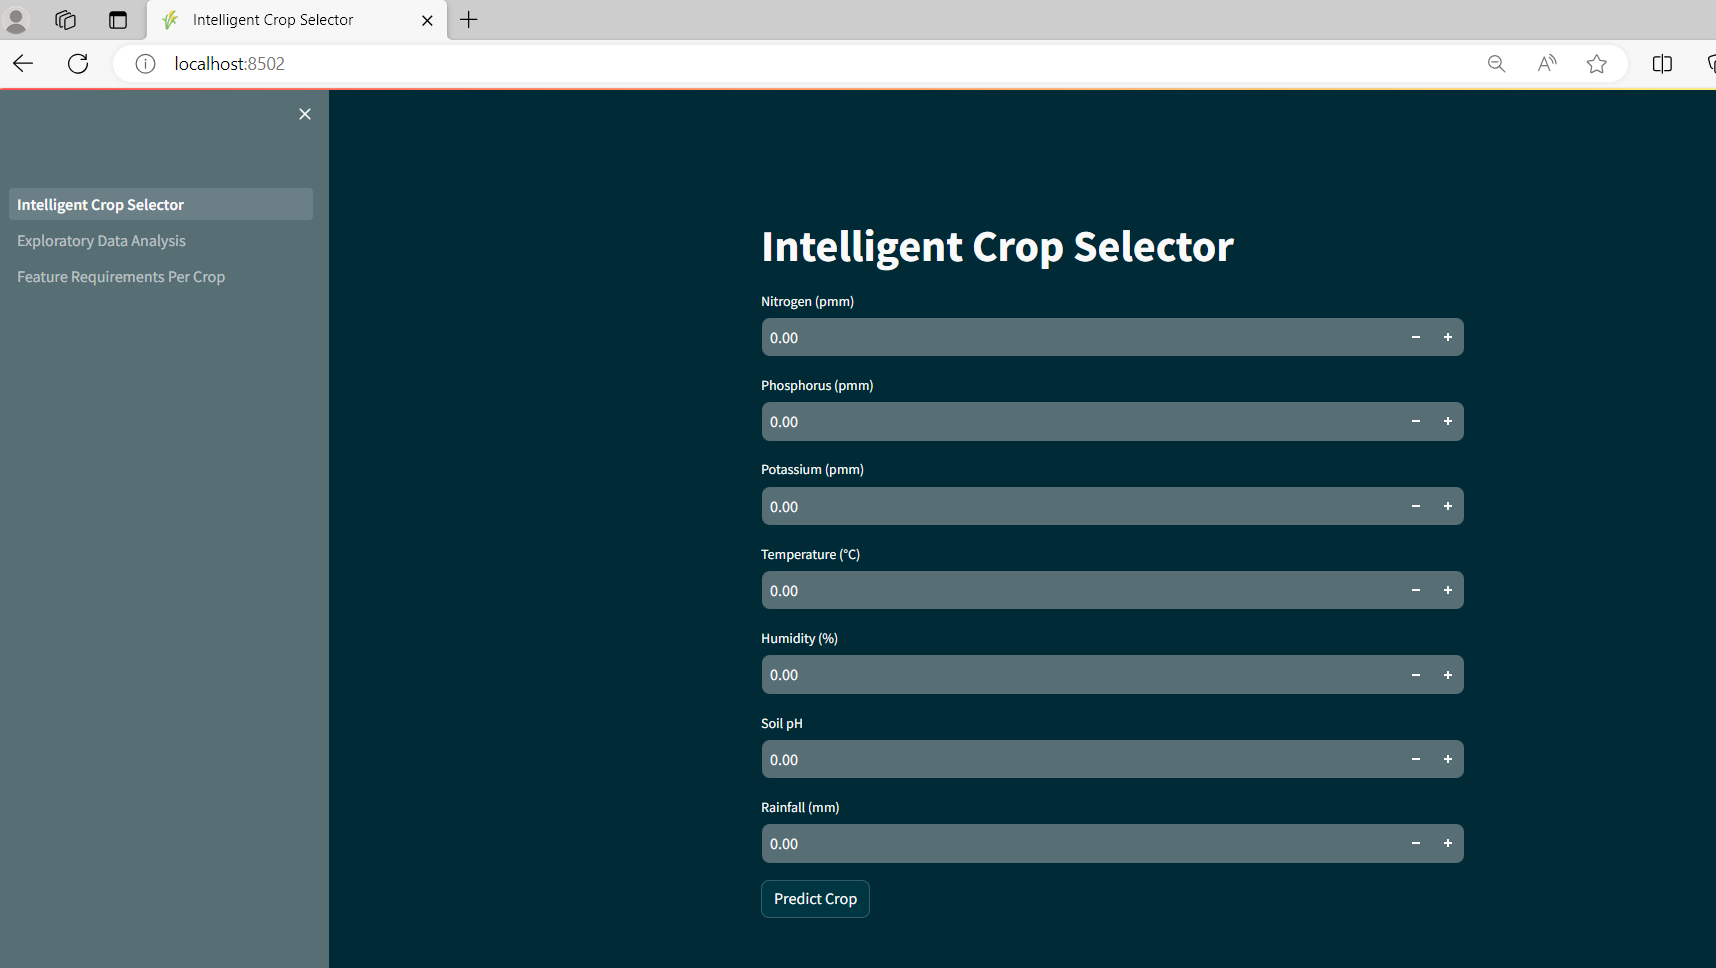


Explorative Data Analysis and Feature Requireemnts sidebars data visualizations for the model as shown below:

###### Explatory Data Anlysis
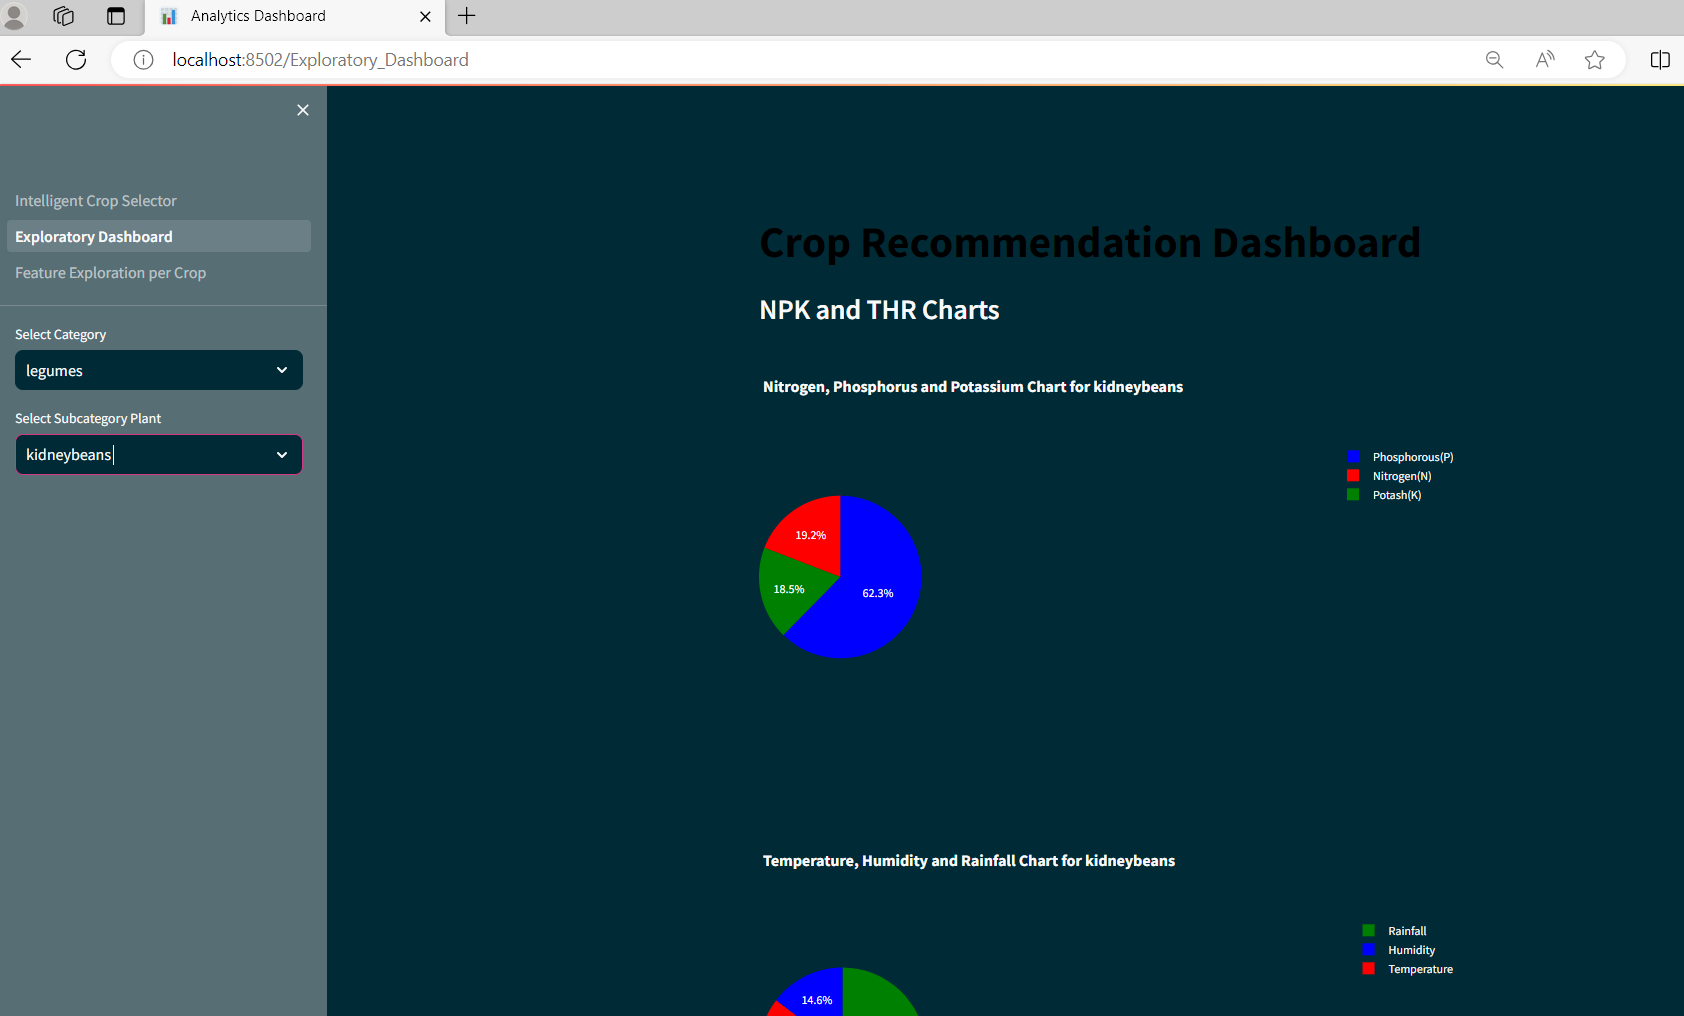
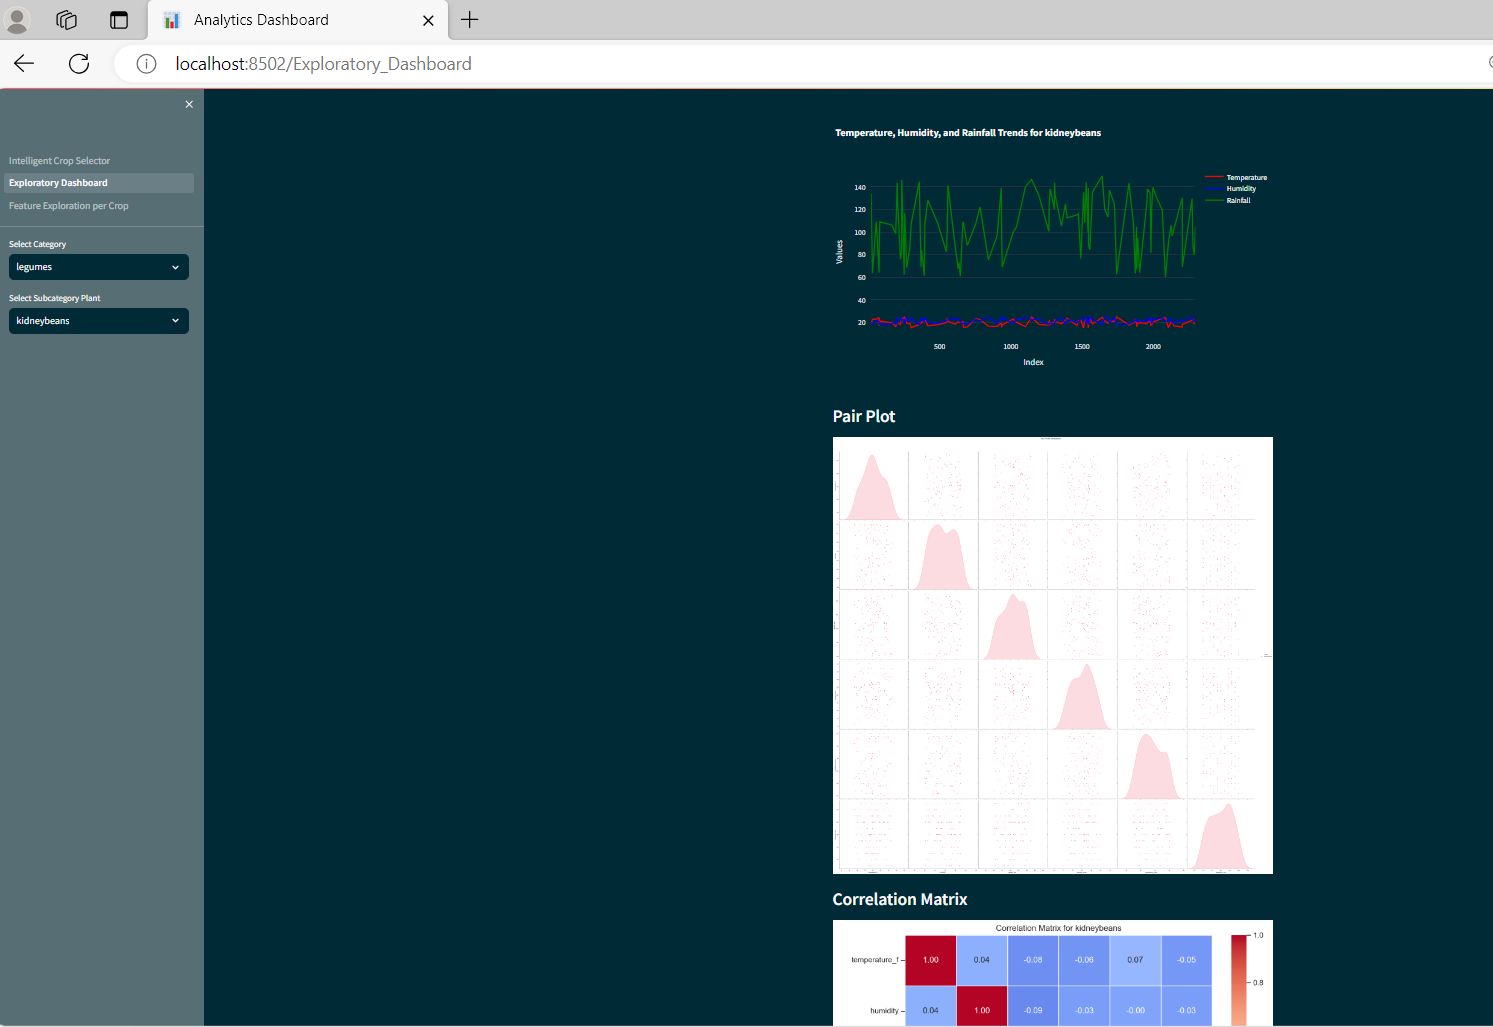
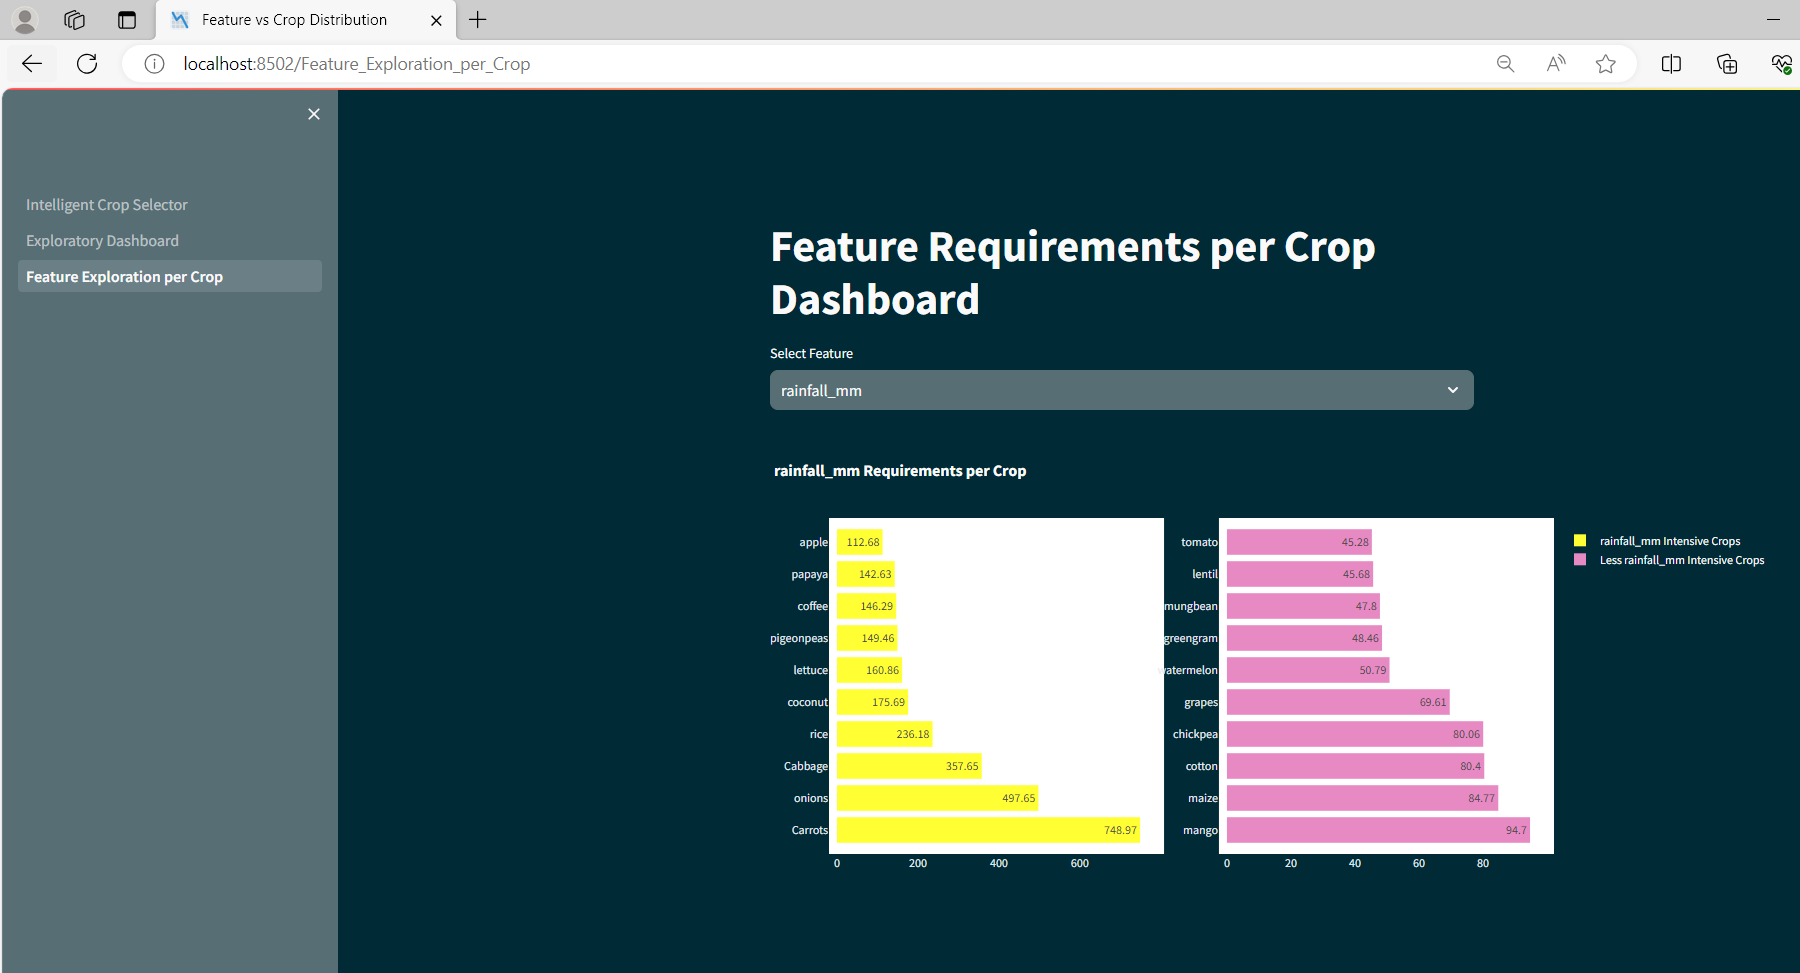


##### You can access the crop recommendation system at:  https://intelligent-crop-selectorweb.streamlit.app/